# Clone the repo

In [1]:
# # Clone the entire repo.
# !git clone -b master --single-branch https://github.com/NewLuminous/Zalo-Vietnamese-Wiki-QA.git zaloqa
# %cd zaloqa

# Install & load libraries

In [2]:
import modeling
import evaluation
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import transforming

In [3]:
# To reload a module while in the interactive mode
import importlib
importlib.reload(modeling)

<module 'modeling' from '/home/quocan/PycharmProjects/Zalo-Vietnamese-Wiki-QA/modeling/__init__.py'>

# Load data

In [4]:
from utils import data_loading

zalo_data = data_loading.load(['zaloai'])
zalo_data

,question,text,label
0,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,Quang Hải giành được chức vô địch U21 quốc gia...,"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,Quang Hải giành được chức vô địch U21 quốc gia...,Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,Quang Hải giành được chức vô địch U21 quốc gia...,"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,Mỗi hiệp bóng đá kéo dài bao lâu,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...
18103,Thành phố nào là thủ đô của Costa Rica,San José (tiếng Tây Ban Nha: San José; ) là th...,True
18104,Thành phố nào là thủ đô của Costa Rica,Vì Costa Rica có địa hình đa dạng nhiều núi no...,True
18105,Thành phố nào là thủ đô của Costa Rica,"Với địa vị là thủ đô, San José là nơi đặt trụ ...",True
18106,Thành phố nào là thủ đô của Costa Rica,Santa Teresa là một thị xã nhỏ ở tỉnh Puntaren...,True


# Train & evaluate

In [5]:
from sklearn.model_selection import train_test_split

X = zalo_data.drop(columns=['label'])
y = zalo_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# KNN + tfidf

In [6]:
model = modeling.get_model('knn')(vectorizer='tfidf')
model.fit(X_train, y_train)

In [7]:
y_pred = model.predict(X_test)

In [8]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.6007730535615682
Classification report:
               precision    recall  f1-score   support

       False       0.69      0.75      0.72      1234
        True       0.34      0.28      0.31       577

    accuracy                           0.60      1811
   macro avg       0.52      0.51      0.51      1811
weighted avg       0.58      0.60      0.59      1811



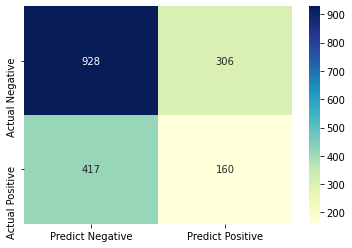

In [9]:
evaluation.plot_confusion_matrix(y_test, y_pred)

# KNN + CountVectorizer

In [ ]:
model = modeling.get_model('knn')(vectorizer='bow')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

In [ ]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [10]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [11]:
y_pred = model.predict(X_test)

In [12]:
print('Accuracy:', evaluation.get_accuracy(y_test, y_pred))
evaluation.print_classification_report(y_test, y_pred)

Accuracy: 0.7045831032578685
Classification report:
               precision    recall  f1-score   support

       False       0.75      0.85      0.80      1234
        True       0.55      0.39      0.46       577

    accuracy                           0.70      1811
   macro avg       0.65      0.62      0.63      1811
weighted avg       0.69      0.70      0.69      1811



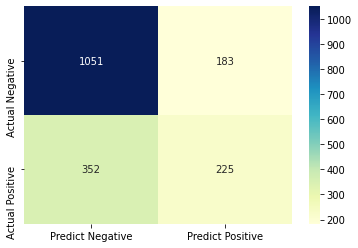

In [13]:
evaluation.plot_confusion_matrix(y_test, y_pred)